# Yin and Wei 2021 - Savings in sensorimotor adaptation without explicit strategy

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import fixed

## Figure 1 

### 30 deg CCW rotation 

In order to rotate a cursor you can use equations that take in Cartesian coordinates (x & y values), transforms them into polar coordinates (degrees or radians) of the value you want. 

The equations to do this are as follows where; $x_{rotated}$ is the rotated x location in Cartesian coordinates, $x_{cartesian}$ is the x Cartesian coordinate, $d$ is the degree of rotation (negative for clockwise; positive for counterclockwise), $y_{rotated}$ is the rotated y location in Cartesian coordinates, $y_{cartesian}$ is the y Cartesian coordinate: 

$x_{rotated} = x_{cartesian} * cos(d * \frac{\pi}{180}) - y_{cartesian} * sin(d * \frac{\pi}{180})$

$y_{rotated} = x_{cartesian} * sin(d * \frac{\pi}{180}) + y_{cartesian} * cos(d * \frac{\pi}{180})$ 

Below is a function that will rotate the cursor.

In [2]:
def cursor_rot_vis(x_cart,y_cart, rotation):
  # INPUT:
  # x&y _cart: x and y Cartesian location of cursor (can be scalar or vector)
  # rotation: desired rotation (in degrees) (+ = CCW; - = CW)

  # OUTPUT:
  # x&y _rot: x and y Cartesian locations of rotated cursor (can be scalar or vector)

  x_rot = x_cart * np.cos(rotation * np.pi/180) - y_cart * np.sin(rotation * np.pi/180)
  y_rot = x_cart * np.sin(rotation * np.pi/180) + y_cart * np.cos(rotation * np.pi/180)

  # Visualize 
  plt.figure()
  plt.scatter(x_cart,y_cart,s=50,label='hand')
  plt.scatter(x_rot, y_rot, s=50, label='curosr')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc='best')
  plt.gca().set_ylim(-30,30)
  plt.gca().set_xlim(-30,30)
  plt.show()

  return x_rot, y_rot

In [3]:
w = widgets.interact(cursor_rot_vis, x_cart = (-20,20,1), y_cart = (-20,20,1), rotation = (-90,90,1))

interactive(children=(IntSlider(value=0, description='x_cart', max=20, min=-20), IntSlider(value=0, descriptio…

### 30 deg clamp

To do a clamp rotation, one simple needs to get radial position from start location and use that with a constant rotation angle.

$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$

$x_{rotated} = d * cos(clamp) + center_x$

$y_{rotated} = d * sin(clamp) + center_y$

In [9]:
def clamp(x,y,rotationD, center=(0,0)):
    '''
    Clamp rotation example 

    INPUTS:
    x,y: x,y cartesian coordinates, float
    rotationD: rotation to clamp, float
    center: x,y of center, tuple of floats

    OUTPUT: 
    Visaulize clamp rotation 
    '''

    d = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    x_clamp = d * np.cos(rotationD * np.pi/180) + center[0]
    y_clamp = d * np.sin(rotationD * np.pi/180) + center[1]

    # Visualize 
    plt.figure()
    plt.scatter(x,y,s=50,label='hand')
    plt.scatter(x_clamp, y_clamp, s=50, label='curosr')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.gca().set_ylim(-30,30)
    plt.gca().set_xlim(-30,30)
    plt.show()

    return x_clamp, y_clamp

In [16]:
w = widgets.interact(clamp, x = (-20,20,1), y = (-20,20,1), rotationD = (0,360,1), center=fixed([0,0]))

interactive(children=(IntSlider(value=0, description='x', max=20, min=-20), IntSlider(value=0, description='y'…

### Gradual learning 

Graph the perturbation schedule

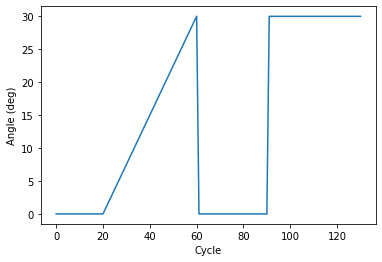

In [26]:
cycle = np.arange(0, 20+40+40+10+20+1, 1)
perturbation = []
rotation = 0 
for c in cycle:
    if c <= 20:
        perturbation.append(0)
    elif c > 20 and c <= 60:
        rotation += 0.0938 * 8 # deg
        perturbation.append(rotation)
    elif c > 60 and c <= 90:
        perturbation.append(0)
    elif c > 90 :
        perturbation.append(30) # deg 

# visualize 
plt.figure()
plt.plot(cycle, perturbation)
plt.xlabel('Cycle')
plt.ylabel('Angle (deg)')
plt.show()

Other learning paradigms 

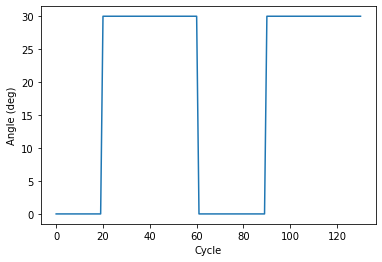

In [27]:
cycle = np.arange(0, 20+40+40+10+20+1, 1)
perturbation = np.zeros_like(cycle)
perturbation[20:61] = 30
perturbation[90:131] = 30

# visualize 
plt.figure()
plt.plot(cycle, perturbation)
plt.xlabel('Cycle')
plt.ylabel('Angle (deg)')
plt.show()